# Reverse Nodes in k-Group
$\quad$ Given the `head` of a linked list, reverse the nodes of the list k at a time, and return the modified list.

$\quad$ `k` is a positive integer and is less than or equal to the length of the linked list. If the number of nodes is not a multiple of `k` then left-out nodes, in the end, should remain as it is.

$\quad$ You may not alter the values in the list's nodes, only nodes themselves may be changed.

# Examples
**Example 1:**<br>
Input: head = [1,2,3,4,5], k = 2<br>
Output: [2,1,4,3,5]

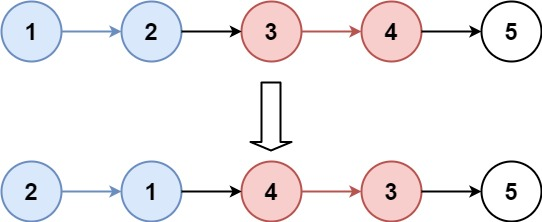

**Example 2:**<br>
Input: head = [1,2,3,4,5], k = 3<br>
Output: [3,2,1,4,5]

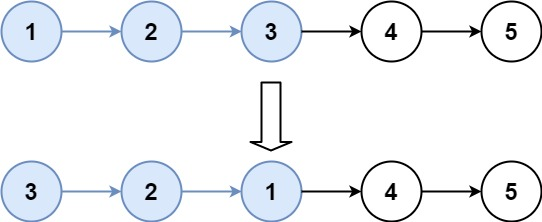

In [ ]:
from typing import Optional

# Definition for singly-linked list.


class ListNode:
    def __init__(self, val=0, next=None):
        self.val = val
        self.next = next


class Solution:
    def reverseKGroup(self, head: Optional[ListNode], k: int) -> Optional[ListNode]:
        if head == None:
            return None
        result = ListNode(0, next=head)
        end_of_last = result
        count = 1
        def go_ahead():
            if count < k:
                temp = end_of_last.next
                end_of_last.next = head.next
                head.next = head.next.next
                end_of_last.next.next = temp
            else:
                end_of_last = head
                count = 0
                head = head.next
            count += 1

        while head.next != None:
            go_ahead()
            

        if count != k:
            head = end_of_last.next
            count = 1
            while head.next != None:
                go_ahead()

        return result.next

$\quad$ Using Example 2 as a reference, after each go_ahead operation, the linked list appears as follows:
- 1 -> 2 -> 3 -> 4 -> 5 (initial)
- 0 -> 1 -> 2 -> 3 -> 4 -> 5 (add a dummy node at the beginning)
- 0 -> 2 -> 1 -> 3 -> 4 -> 5
- 0 -> 3 -> 2 -> 1 -> 4 -> 5
- 0 -> 3 -> 2 -> 1 -> 5 -> 4
- 0 -> 3 -> 2 -> 1 -> 4 -> 5

$\quad$ In the above algorithm: if the last segment has fewer than `k` nodes, it needs to be reversed twice. To avoid this issue, the total number of nodes can be counted in advance.

In [ ]:
from typing import Optional

# Definition for singly-linked list.


class ListNode:
    def __init__(self, val=0, next=None):
        self.val = val
        self.next = next


class Solution:
    def reverseKGroup(self, head: Optional[ListNode], k: int) -> Optional[ListNode]:
        if not head or k == 1:
            return head

        dummy = ListNode(0)
        dummy.next = head
        prev = dummy
        curr = head

        # Count the number of nodes in the list
        count = 0
        while curr:
            count += 1
            curr = curr.next

        # Reverse k nodes at a time
        while count >= k:
            curr = prev.next
            nxt = curr.next

            # Reverse k nodes
            for _ in range(1, k):
                curr.next = nxt.next
                nxt.next = prev.next
                prev.next = nxt
                nxt = curr.next

            prev = curr
            count -= k

        return dummy.next